In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

# BIT AI - 04 Drzewa decyzyjne i ensemble learning

## Part I - Predykcja poziomu tkanki tłuszczowej - regresja

### Zbiór danych **bodyfat** - podstawowa analiza


In [2]:
train_df = pd.read_csv("data/bodyfat_train.csv")
test_df = pd.read_csv("data/bodyfat_test.csv")

In [3]:
train_df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
211,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
212,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
213,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


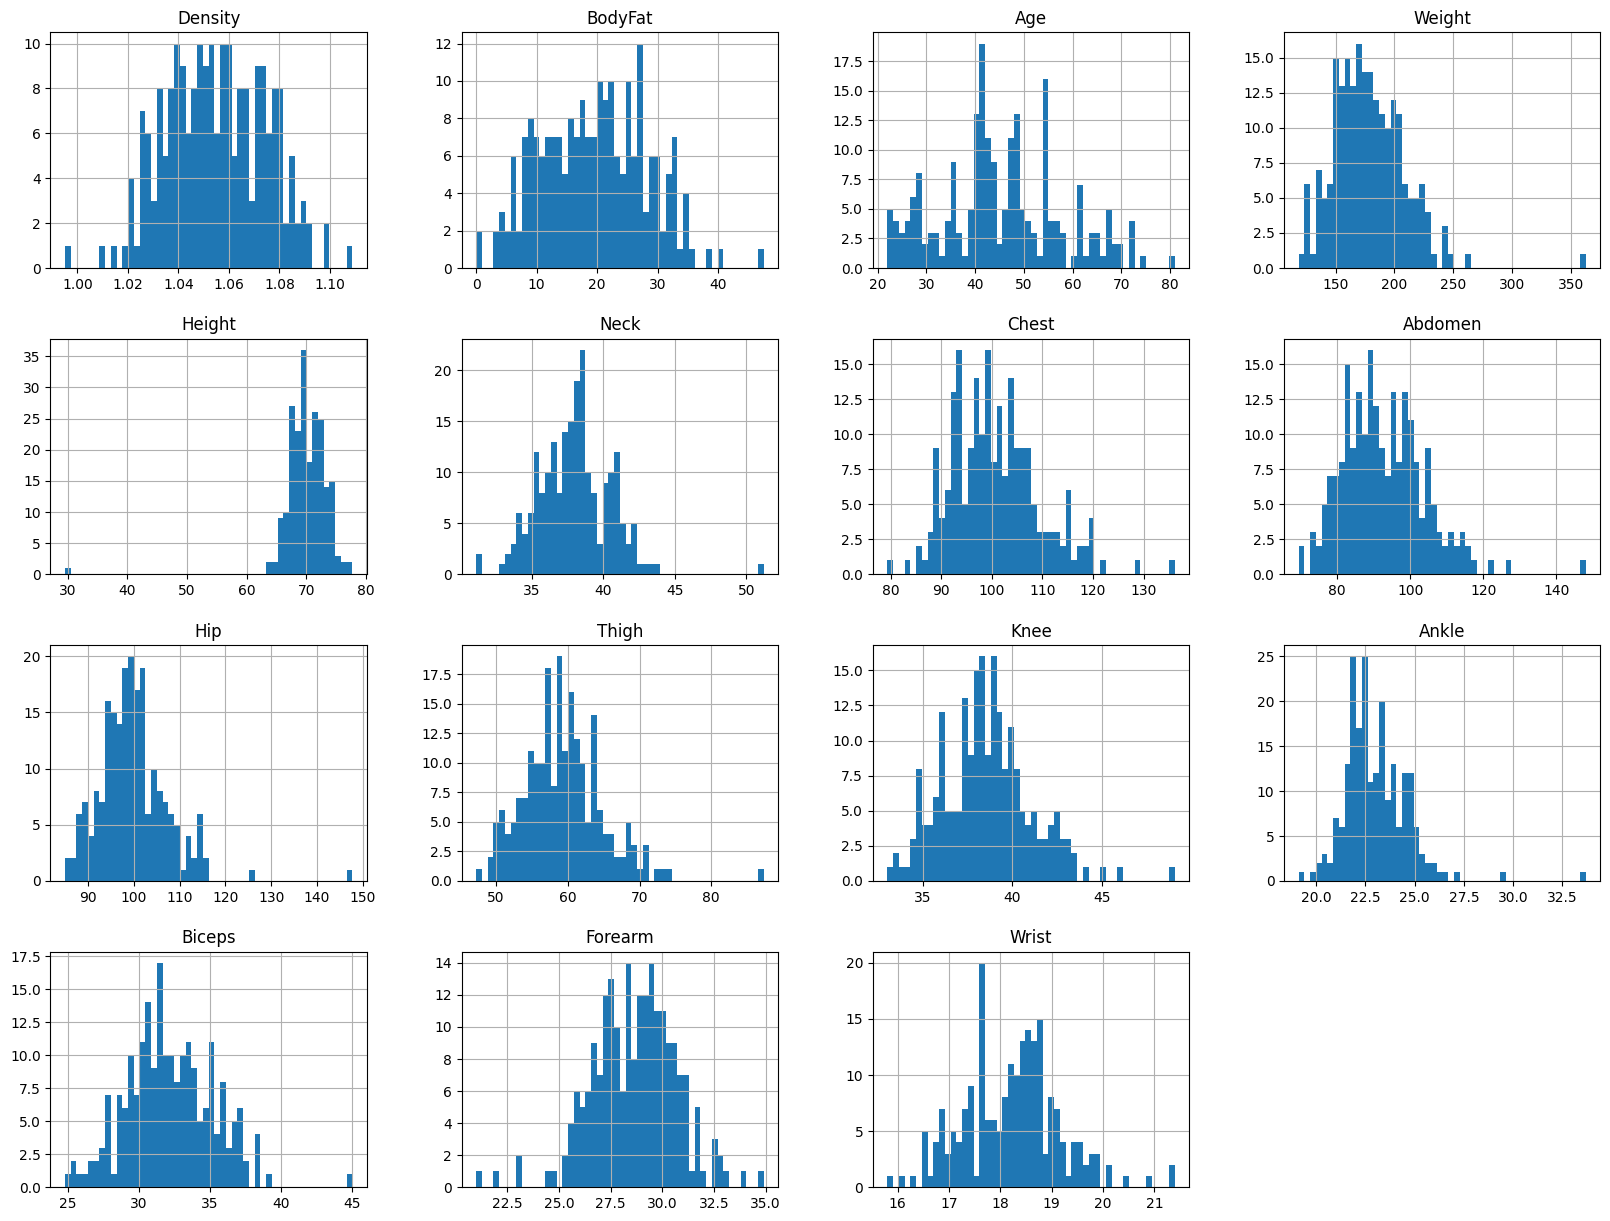

In [4]:
%matplotlib inline
train_df.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: >

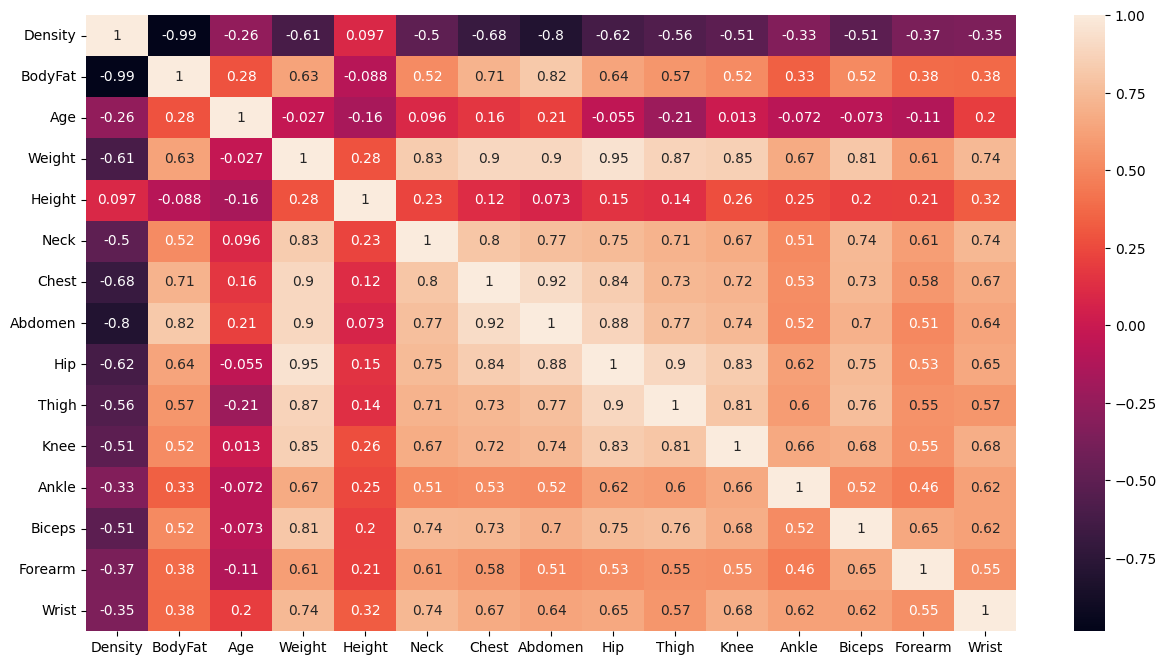

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(train_df.corr(), annot=True, ax=ax)

### Trening
Przygotowujemy do trenowania i tworzymy **DecisionTreeRegressor**.

Wyrzucam cechę *Density* na potrzeby dydaktyczne, bo ma bardzo dużą korelację.


In [6]:
X_train, y_train = train_df.drop(columns=["BodyFat", "Density"]), train_df["BodyFat"]
X_test, y_test = test_df.drop(columns=["BodyFat", "Density"]), test_df["BodyFat"]

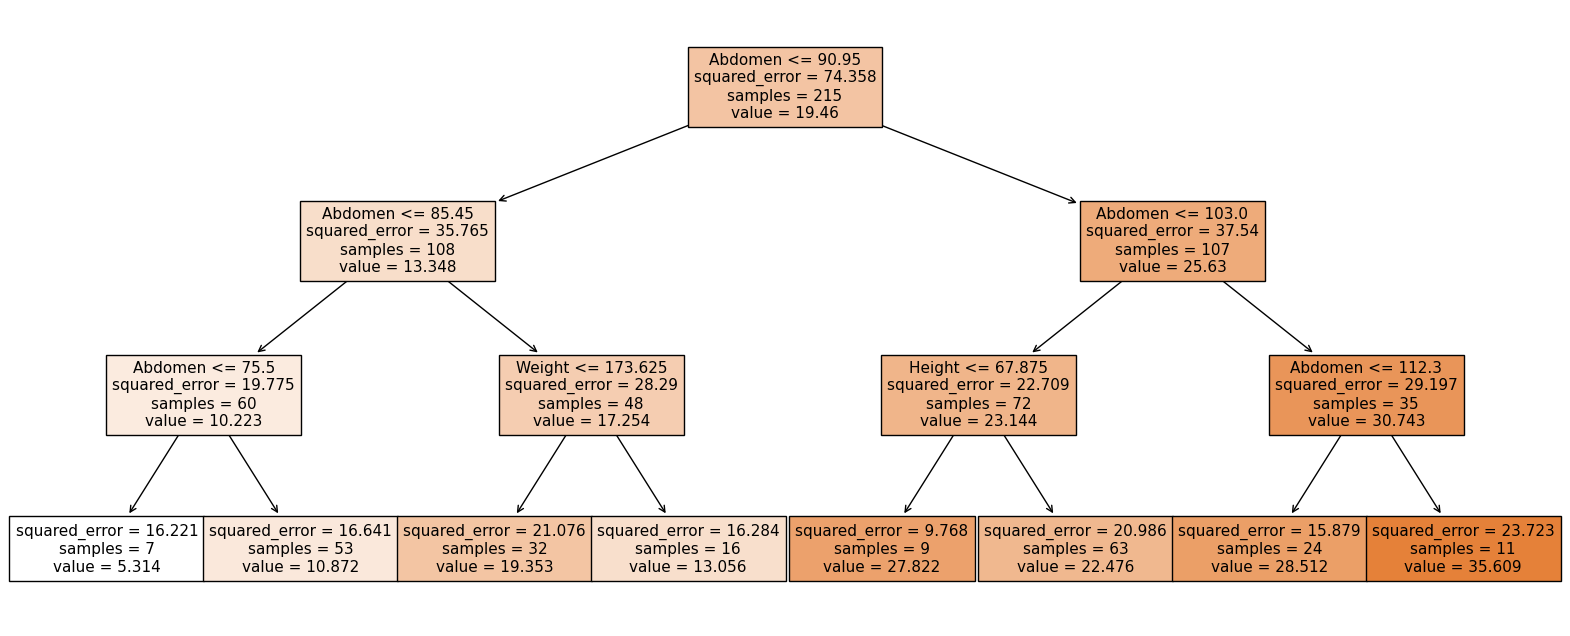

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_regr = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regr.fit(X_train, y_train)

fig = plt.figure(figsize=(20, 8))
_ = tree.plot_tree(tree_regr, feature_names=list(X_train.columns), filled=True)

## Part II - Predykcja choroby kardiologicznej - klasyfikacja

### Zbiór danych **heart** - podstawowa analiza


In [8]:
train_df = pd.read_csv("data/heart_train.csv")
test_df = pd.read_csv("data/heart_test.csv")

In [9]:
train_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
776,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
777,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
778,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
779,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Mamy sporo zmiennych kategorycznych - dla drzewa decyzyjnego to nie problem.

In [10]:
for col in ["ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]:
    print(col)
    print(train_df[col].value_counts())
    print()

ChestPainType
ASY    429
NAP    173
ATA    146
TA      33
Name: ChestPainType, dtype: int64

RestingECG
Normal    475
ST        153
LVH       153
Name: RestingECG, dtype: int64

ExerciseAngina
N    462
Y    319
Name: ExerciseAngina, dtype: int64

ST_Slope
Flat    398
Up      332
Down     51
Name: ST_Slope, dtype: int64



/tmp/ipykernel_46772/2663042193.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, ax=ax)


<Axes: >

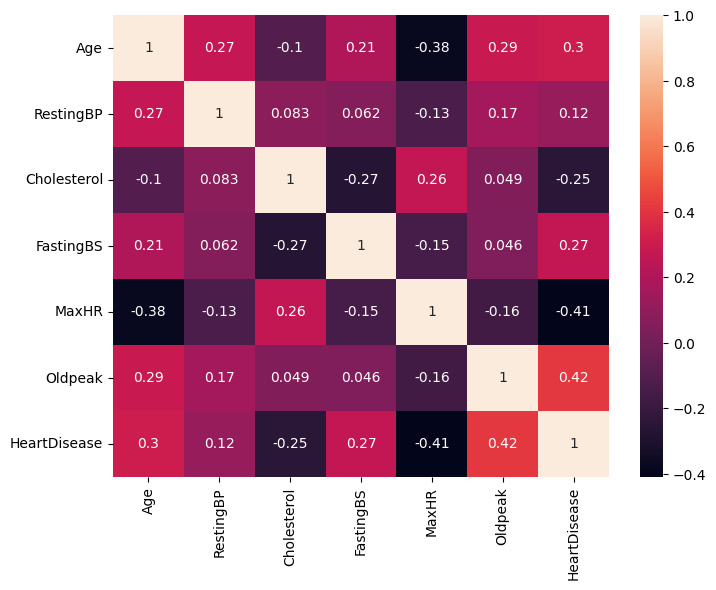

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(train_df.corr(), annot=True, ax=ax)

### Trening


Trenujemy klasyfikator - warto zauważyć na drzewie, że zmienne kategoryczne zostały implicite przetransformowane na one-hot encoding.

In [12]:
train_df, test_df = pd.get_dummies(train_df), pd.get_dummies(test_df)

In [13]:
X_train, y_train = train_df.drop("HeartDisease", axis=1), train_df["HeartDisease"]
X_test, y_test = test_df.drop("HeartDisease", axis=1), test_df["HeartDisease"]

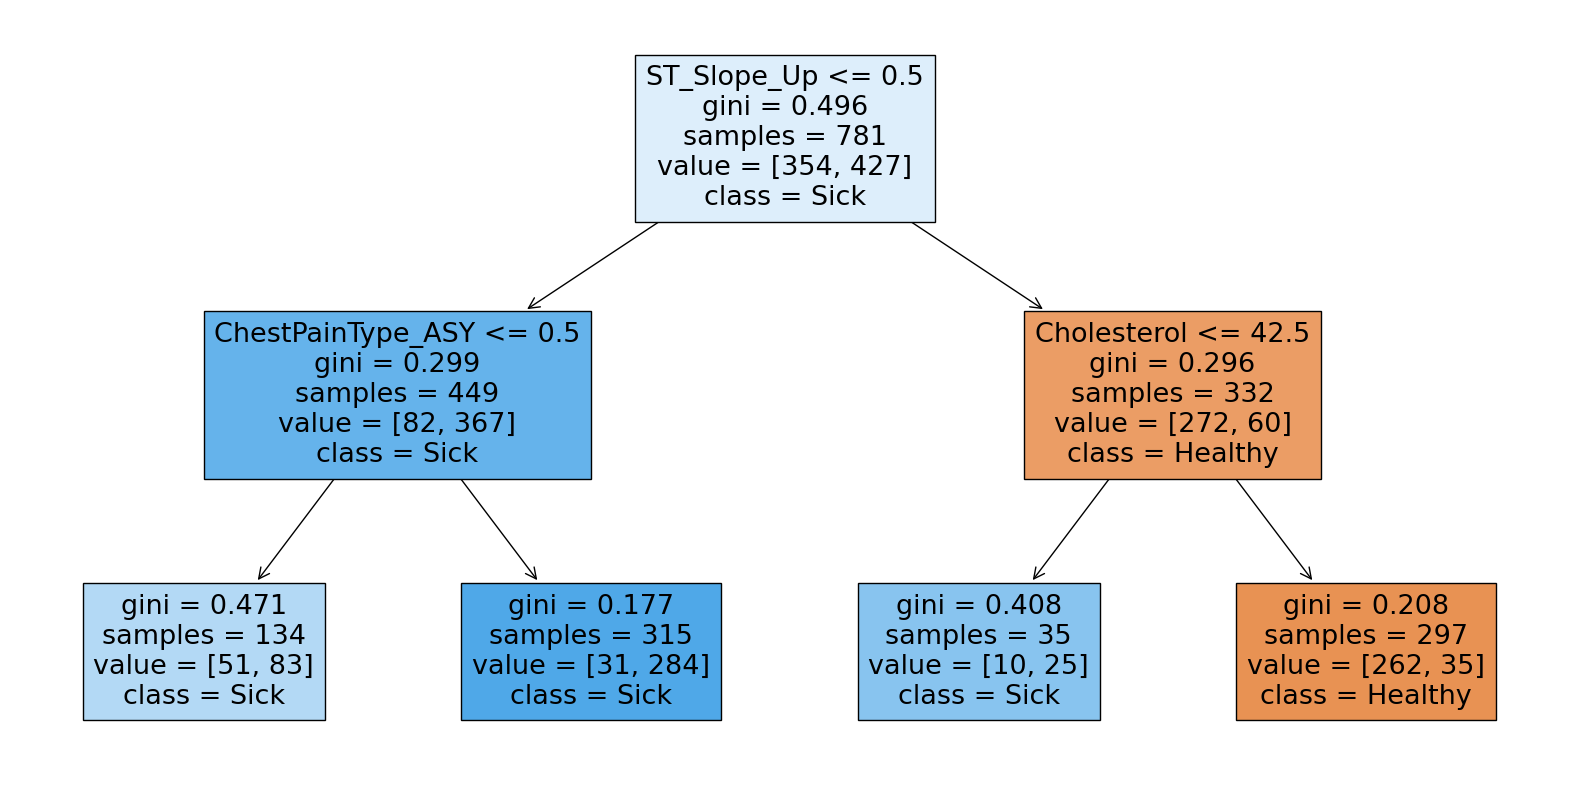

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

fig = plt.figure(figsize=(20, 10))
_ = tree.plot_tree(tree_clf, feature_names=list(X_train.columns), class_names=["Healthy", "Sick"], filled=True)

Jak nie określimy maksymalnej głębokości - drzewo trenuje się aż wszystkie liście nie będą czy

In [15]:
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

y_train_pred = tree_clf.predict(X_train)
print("Accuracy on train: ", accuracy_score(y_train, y_train_pred))

y_test_pred = tree_clf.predict(X_test)
print("Accuracy on test: ", accuracy_score(y_test, y_test_pred))

Accuracy on train:  1.0
Accuracy on test:  0.7737226277372263


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"max_depth": [i for i in range(2, 20)]}]
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 3}

In [17]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

y_train_pred = tree_clf.predict(X_train)
print("Accuracy on train: ", accuracy_score(y_train, y_train_pred))

y_test_pred = tree_clf.predict(X_test)
print("Accuracy on test: ", accuracy_score(y_test, y_test_pred))

Accuracy on train:  0.8578745198463509
Accuracy on test:  0.8394160583941606


### Zadanie:
Stwórz 100 podzbiorów wybranego zbioru danych - każdy z nich stwórz biorąc losowo 50-80% oryginalnego datasetu.

Każdy podzbiór wykorzystaj do wytrenowania osobnego drzewa decyzyjnego. 
Wykonaj predykcję zbioru testowego dla każdego drzewa i uśrednij je.

Oceń sprawność tak stworzonego modelu na datasecie testowym.

## Part III - ensemble

Bagging classifier - ta metoda działa podobnie jak to, co robimy w zadaniu 1

In [18]:
from sklearn.ensemble import BaggingClassifier

bagg_clf = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True)
bagg_clf.fit(X_train, y_train)

bagg_pred = bagg_clf.predict(X_test)
print(f"Bagging classifier: {accuracy_score(y_test, bagg_pred)}")

Bagging classifier: 0.8686131386861314


Random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)
print(f"Random forest classifier: {accuracy_score(y_test, rf_pred)}")

Random forest classifier: 0.8832116788321168


Tuning hiperparametrów używając gridsearcha - dla siatki hiperparametrów szukamy takich, żeby klasyfikator radził sobie jak najlepiej. Wyniki sprawdzamy używając Cross-Validation.

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "max_depth": [i for i in range(2, 7)],  # tuning klasyfikatorów bazowych
        "max_features": [0.4, 0.6, 0.8, "sqrt", "log2"],
    }
]
grid_search = GridSearchCV(
    RandomForestClassifier(), param_grid, cv=4, scoring="accuracy", return_train_score=True, verbose=1
)
grid_search.fit(X_train, y_train)

print("Best params: ", grid_search.best_params_)
rf_clf = RandomForestClassifier(**grid_search.best_params_)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f"Tuned Random Forest: {accuracy_score(y_test, rf_pred)}")

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best params:  {'max_depth': 4, 'max_features': 'log2'}
Tuned Random Forest: 0.8686131386861314
